<a href="https://colab.research.google.com/github/Afnaan-Alqadree/ai-ml-projects/blob/main/AnalysisOfAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

array(5: [52, 8, 753, 581, 223])
sorted(Insertion Sort):[8, 52, 223, 581, 753]
array(10: [477, 562, 726, 505, 635, 957, 126, 604, 934, 336])
sorted(Insertion Sort):[126, 336, 477, 505, 562, 604, 635, 726, 934, 957]
array(15: [625, 908, 551, 395, 379, 973, 642, 311, 664, 795, 388, 455, 573, 93, 342])
sorted(Insertion Sort):[93, 311, 342, 379, 388, 395, 455, 551, 573, 625, 642, 664, 795, 908, 973]
array(20: [375, 314, 677, 899, 620, 486, 21, 92, 323, 592, 327, 395, 293, 455, 686, 641, 829, 193, 832, 308])
sorted(Insertion Sort):[21, 92, 193, 293, 308, 314, 323, 327, 375, 395, 455, 486, 592, 620, 641, 677, 686, 829, 832, 899]


<ipython-input-13-1fe9876d986d>:118: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


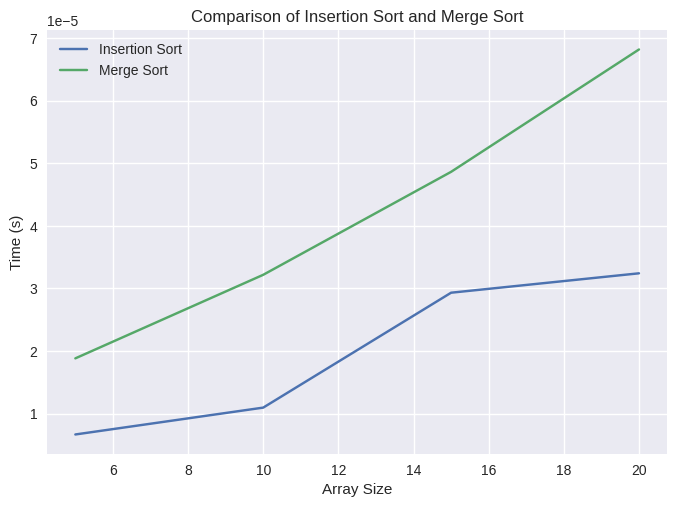

KeyboardInterrupt: ignored

In [ ]:
import time
import random
import matplotlib.pyplot as plt

def insertion_sort(arr):  #insertion sort-- to sort the random array, passed (arr) as a parameter

    for i in range(1, len(arr)): #This initiates a loop that iterates through the array, starting from index 1 up to the length of the array.
     #i represents the current index being considered during each iteration.

        key = arr[i]

        j = i - 1

        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def merge_sort(arr):
    if len(arr) > 1: #The base condition checks if the length of the array is greater than 1. If it's not, the array is considered already sorted (or empty). Bae case: Already sorted
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half) #Recursively calls merge_sort on the divided halves of the array.
                               #This step recursively breaks down the array into smaller parts until they reach a base case of a single element or an empty array.
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1
        print(f:{arr}”)

        while i < len(left_half):  #These loops handle the scenario where one of the halves still has remaining elements after the initial merging.
#They ensure that any remaining elements from left_half or right_half are appended to the end of the arr.
            arr[k] = left_half[i]
            i += 1
            k += 1
          print(f”arr :{arr}”)
        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

def measure_sorting_time(algorithm, arr):
    start_time = time.time() #time.time() captures the current time when the sorting process begins and stores it in start_time.
    algorithm(arr)
    return time.time() - start_time

def modify_array(arr, size): # modifying the array, passing in arr and its size as an arguments
    print(f"\nOriginal Array ({size} elements): {arr}")
    index = int(input(f"Enter the index to modify (0 to {size-1}): "))
    value = int(input("Enter the new value: "))
    arr[index] = value
    print(f"Modified Array: {arr}")

def compare_sorting_algorithms():


    sizes = [5,10,15,20]
    merge_sort_times = []
    insertion_sort_times = []
    merge_sort_outperforms_at = None


    for size in sizes:
        arr = [random.randint(1,1000) for _ in range(size)]
        print(f"array({size}: {arr})")
        insertion_sort_time = measure_sorting_time(insertion_sort, arr.copy()) #pass in insertion_sort as a parameter
        insertion_sort_times.append(insertion_sort_time) #store time taken
        insertion_sort(arr)
        print(f"sorted(Insertion Sort):{arr}")

        merge_sort_time = measure_sorting_time(merge_sort, arr.copy())  #pass in merge_sort as a parameter
        merge_sort_times.append(merge_sort_time) #store the tie=me takem

        if merge_sort_time < insertion_sort_time and merge_sort_outperforms_at is None: #compare time
            merge_sort_outperforms_at = size

    # Plotting before modification
    plot_comparison_graph(sizes, insertion_sort_times, merge_sort_times, merge_sort_outperforms_at)

    # Let the user choose which array to modify
    modify_option = input("Do you want to modify any array? (yes/no): ").lower()
    if modify_option == 'yes':
        size_to_modify = int(input(f"Choose an array size to modify ({', '.join(map(str, sizes))}): "))
        if size_to_modify in sizes:
            arr = [random.randint(1, 1000) for _ in range(size_to_modify)] #can modify in here the array integers
            modify_array(arr, size_to_modify)
            # Re-measure sorting times after modification
            insertion_sort_time = measure_sorting_time(insertion_sort, arr.copy())
            insertion_sort_times[sizes.index(size_to_modify)] = insertion_sort_time

            merge_sort_time = measure_sorting_time(merge_sort, arr.copy())
            merge_sort_times[sizes.index(size_to_modify)] = merge_sort_time

            # Find if merge sort still outperforms after modification
            merge_sort_outperforms_at = None
            for i in range(len(sizes)):
                if merge_sort_times[i] < insertion_sort_times[i] and merge_sort_outperforms_at is None:
                    merge_sort_outperforms_at = sizes[i]

            # Plotting after modification
            plot_comparison_graph(sizes, insertion_sort_times, merge_sort_times, merge_sort_outperforms_at)
        else:
            print("Invalid size choice. Array modification skipped.")
    else:
        print("No modification requested. Exiting...")

def plot_comparison_graph(sizes, insertion_sort_times, merge_sort_times, merge_sort_outperforms_at):
    # Plotting
    plt.style.use('seaborn')
    plt.plot(sizes, insertion_sort_times, label='Insertion Sort')
    plt.plot(sizes, merge_sort_times, label='Merge Sort')
    plt.xlabel('Array Size')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.title('Comparison of Insertion Sort and Merge Sort')

    if merge_sort_outperforms_at is not None:
      x_coord = merge_sort_outperforms_at
      y_coord = merge_sort_times[sizes.index(merge_sort_outperforms_at)]
      plt.annotate('Merge Sort\nOutperforms\nInsertion \n',
                     xy=(x_coord, y_coord),
                     xytext=(x_coord + 1000, y_coord+ 0.5),
                     arrowprops=dict(facecolor='black', shrink=0.05))
    plt.show()

# Run the comparison
compare_sorting_algorithms()










